### **Task 1: Data Preprocessing and EDA**
#### *GMF Investments Portfolio Analysis*

In [4]:
import sys
import os
path = os.path.abspath('../src')
if path not in sys.path:
    sys.path.append(path)

from data_loader import DataLoader
from eda_analysis import EDAAnalysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [5]:
# Load data
loader = DataLoader()
raw_data = loader.fetch_data()
raw_data

g:\Courses\10 Academy\Week 11\portfolio_forecasting\src\data_loader.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(self.tickers, self.start_date, self.end_date)4
[*********************100%***********************]  3 of 3 completed


Price           Close                               High              \
Ticker            BND         SPY        TSLA        BND         SPY   
Date                                                                   
2015-07-01  60.816753  174.917114   17.943333  60.914479  175.363889   
2015-07-02  60.967091  174.756958   18.667999  61.027232  175.566219   
2015-07-06  61.177544  174.259598   18.648001  61.222653  175.043557   
2015-07-07  61.237717  175.355484   17.858667  61.470758  175.481925   
2015-07-08  61.410633  172.413437   16.997334  61.463256  174.293265   
...               ...         ...         ...        ...         ...   
2025-07-24  72.698860  634.419983  305.299988  72.798528  636.150024   
2025-07-25  72.878265  637.099976  316.059998  72.878265  637.580017   
2025-07-28  72.758659  636.940002  325.589996  72.808497  638.039978   
2025-07-29  73.137398  635.260010  321.200012  73.147367  638.669983   
2025-07-30  72.948036  634.460022  319.040009  73.107503  637.679993   

Price                         Low                               Open  \
Ticker            TSLA        BND         SPY        TSLA        BND   
Date                                                                   
2015-07-01   18.174667  60.764131  174.124717   17.856667  60.794202   
2015-07-02   18.830000  60.937020  174.335471   18.220667  60.937020   
2015-07-06   18.779333  61.057266  173.256457   18.420000  61.222653   
2015-07-07   18.346666  61.237717  172.059452   17.384666  61.410622   
2015-07-08   17.386667  61.312902  172.177405   16.954000  61.373043   
...                ...        ...         ...         ...        ...   
2025-07-24  310.149994  72.579254  633.989990  300.410004  72.599185   
2025-07-25  323.630005  72.688891  634.840027  308.010010  72.708822   
2025-07-28  330.489990  72.718791  635.539978  315.690002  72.778590   
2025-07-29  326.250000  72.838394  634.340027  318.250000  72.838394   
2025-07-30  324.450012  72.888229  631.539978  311.619995  72.948036   

Price                                Volume                        
Ticker             SPY        TSLA      BND        SPY       TSLA  
Date                                                               
2015-07-01  175.110995   18.073999  5399300  135979900   31518000  
2015-07-02  175.397627   18.680000  1060100  104373700  107458500  
2015-07-06  173.458775   18.591999  2210700  117975400   61828500  
2015-07-07  174.461933   18.333332  4183200  173820200   91576500  
2015-07-08  174.006657   17.288000  1967800  164020100   93316500  
...                ...         ...      ...        ...        ...  
2025-07-24  634.599976  310.000000  6139200   71307100  156966000  
2025-07-25  635.090027  308.739990  4845900   56865400  148227000  
2025-07-28  637.479980  318.450012  5806600   54917100  112673800  
2025-07-29  638.349976  325.549988  7397900   60556300   87358900  
2025-07-30  635.919983  322.179993  5554600   80418900   83931900  

[2535 rows x 15 columns]

In [6]:
raw_data.shape

(2535, 15)

In [7]:
raw_data.columns.levels[0]

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [8]:
price = raw_data.Close.dropna()

In [9]:
price

Ticker,BND,SPY,TSLA
Date,,,
2015-07-01,60.816753,174.917114,17.943333
2015-07-02,60.967091,174.756958,18.667999
2015-07-06,61.177544,174.259598,18.648001
2015-07-07,61.237717,175.355484,17.858667
2015-07-08,61.410633,172.413437,16.997334
...,...,...,...
2025-07-24,72.698860,634.419983,305.299988
2025-07-25,72.878265,637.099976,316.059998
2025-07-28,72.758659,636.940002,325.589996


In [13]:
processed_data = loader.preprocess_data(raw_data)
# returns_data = loader.get_combined_returns(processed_data)
daily_return, volatility = loader.preprocess_data(raw_data)
print('--------- Daily Return Data ---------')
display(daily_return.head())
print('\n--------- Volatility Data ---------')
display(volatility.head())
# print(f"Date range: {returns_data.index[0]} to {returns_data.index[-1]}")

--------- Daily Return Data ---------


Ticker,BND,SPY,TSLA
Date,,,
2015-07-02,0.002472,-0.000916,0.040386
2015-07-06,0.003452,-0.002846,-0.001071
2015-07-07,0.000984,0.006289,-0.042328
2015-07-08,0.002824,-0.016778,-0.048231
2015-07-09,-0.003304,0.001809,0.011610



--------- Volatility Data ---------


Ticker,BND,SPY,TSLA
Date,,,
2015-07-02,NaN,NaN,NaN
2015-07-06,NaN,NaN,NaN
2015-07-07,NaN,NaN,NaN
2015-07-08,NaN,NaN,NaN
2015-07-09,NaN,NaN,NaN


In [14]:
raw_data.columns.levels[0]

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [27]:
# EDA Analysis
import warnings
warnings.filterwarnings('ignore')
eda = EDAAnalysis()

# Basic statistics
stats = eda.basic_statistics()
print("\nBasic Statistics:")

display(stats)

Calculating Basic Statistics for the closing price . . . . .  



[*********************100%***********************]  3 of 3 completed


Basic Statistics:


,count,mean,std,min,max,Variance,Skewness,Kurtosis
Ticker,,,,,,,,
BND,2534.0,0.000078,0.003460,-0.054385,0.042201,0.000012,-0.944789,36.335172
SPY,2534.0,0.000575,0.011491,-0.109424,0.105019,0.000132,-0.309364,13.903792
TSLA,2534.0,0.001828,0.037285,-0.210628,0.226900,0.001390,0.294882,4.314649


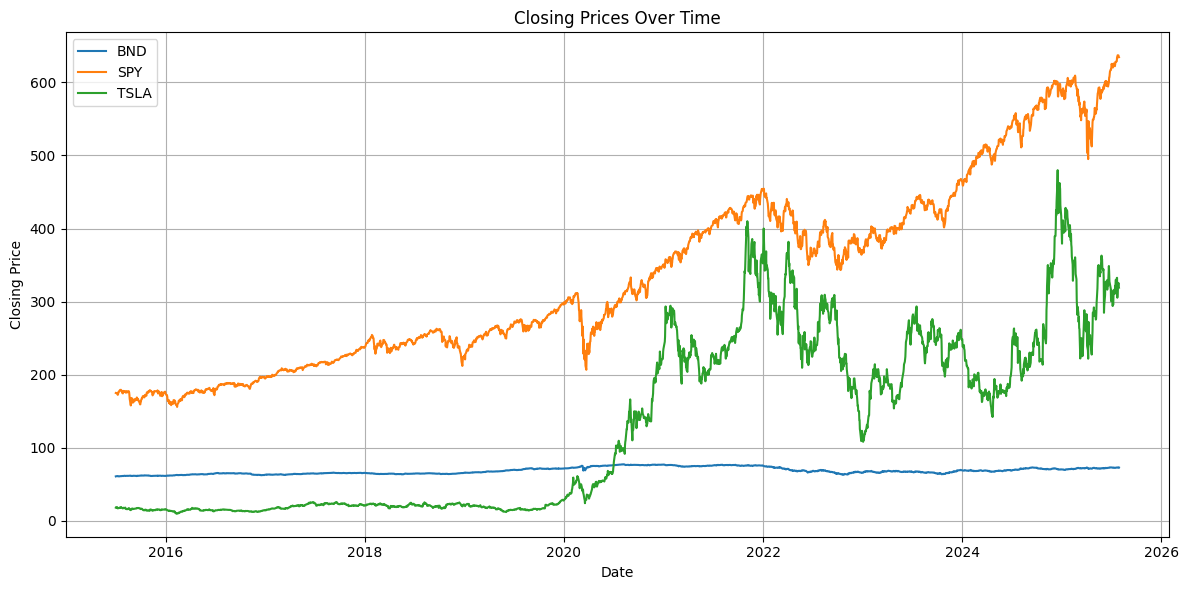

In [28]:
# Closing Price trends over time
eda.plot_closing_prices()

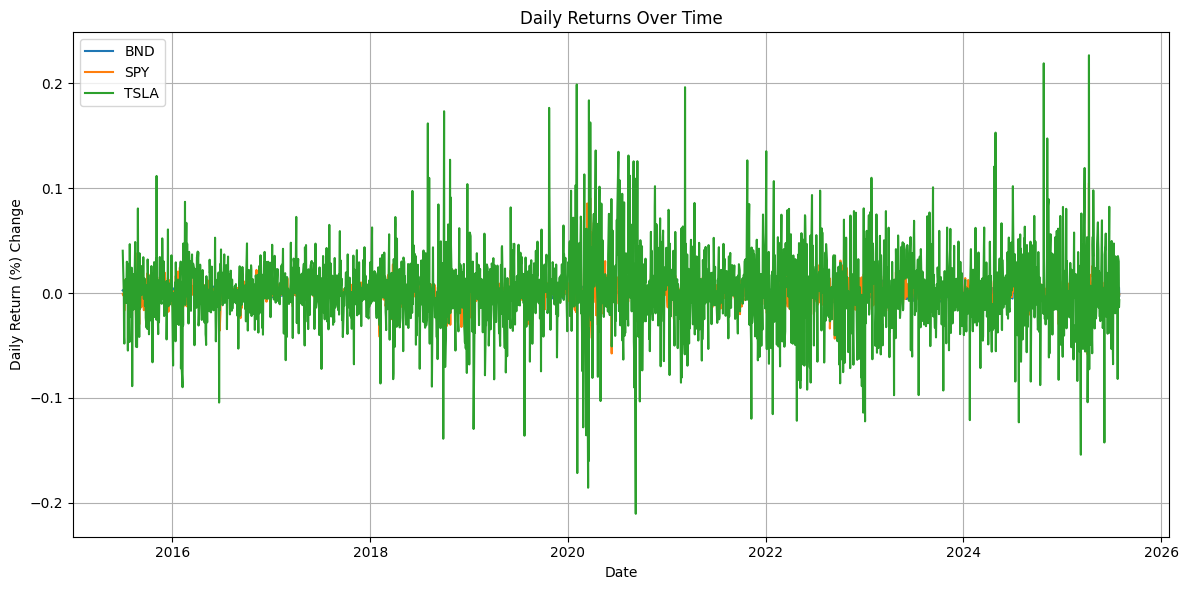

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
BND,2534.0,0.000078,0.003460,-0.054385,-0.001530,0.000127,0.001783,0.042201
SPY,2534.0,0.000575,0.011491,-0.109424,-0.003661,0.000645,0.005993,0.105019
TSLA,2534.0,0.001828,0.037285,-0.210628,-0.017368,0.001261,0.019718,0.226900


In [30]:
# Daily Returns trends over time
eda.plot_daily_return()

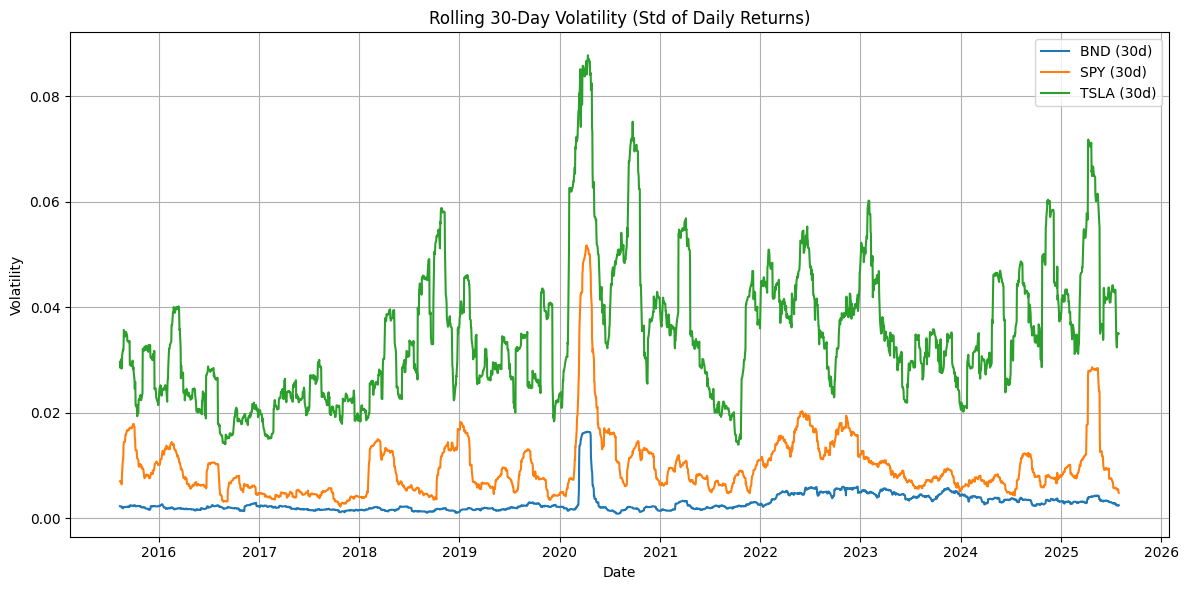

Ticker,BND,SPY,TSLA
Date,,,
2015-08-13,0.002284,0.007020,0.029667
2015-08-14,0.002252,0.007044,0.028541
2015-08-17,0.002191,0.007080,0.030136
2015-08-18,0.002217,0.007025,0.029508
2015-08-19,0.002252,0.006443,0.028386
...,...,...,...
2025-07-24,0.002465,0.005543,0.034302
2025-07-25,0.002441,0.005489,0.034955
2025-07-28,0.002378,0.005492,0.035135


In [33]:
#plot Volatility trends over time
eda.plot_volatility()

In [34]:
from termcolor import colored
# Data Stationary test
stationarity = eda.test_stationarity()
print(colored("Stationarity Test Results:", 'blue', attrs=['bold']))
display(stationarity)

# Interpret the stationarity test results
print("\nInterpretation:")
for ticker, row in stationarity.iterrows():
    print(f"{ticker}: p-value = {row['p_value']:.4f} -> {row['stationarity']}")
    if row['p_value'] < 0.05:
        print(colored(f" The {ticker} time series is likely stationary (rejects null hypothesis).", 'red', attrs=['bold']))
    else:
        print(colored(f" The {ticker} time series is likely non-stationary (fails to reject null hypothesis).", 'green', attrs=['bold']))

Stationarity Test Results:


,adf_stat,p_value,used_lag,n_obs,stationarity
BND,-1.53625,0.515509,13,2521,Non-Stationary
SPY,0.690813,0.989653,9,2525,Non-Stationary
TSLA,-1.418872,0.573196,27,2507,Non-Stationary



Interpretation:
BND: p-value = 0.5155 -> Non-Stationary
 The BND time series is likely non-stationary (fails to reject null hypothesis).
SPY: p-value = 0.9897 -> Non-Stationary
 The SPY time series is likely non-stationary (fails to reject null hypothesis).
TSLA: p-value = 0.5732 -> Non-Stationary
 The TSLA time series is likely non-stationary (fails to reject null hypothesis).



Interpretation:
BND: p-value = 0.5155 -> Non-Stationary
  The BND time series is likely non-stationary (fails to reject null hypothesis of unit root).
SPY: p-value = 0.9897 -> Non-Stationary
  The SPY time series is likely non-stationary (fails to reject null hypothesis of unit root).
TSLA: p-value = 0.5732 -> Non-Stationary
  The TSLA time series is likely non-stationary (fails to reject null hypothesis of unit root).


In [44]:
# Risk metrics for TSLA
risk_metrics = eda.calculate_risk_metrics('TSLA')
display(risk_metrics)

print(f"TSLA Risk Metrics:")
print(f"VaR _ 95: {risk_metrics['VaR_95']}")
print(f"Sharpe Ratio: {risk_metrics['Sharpe_Ratio']}")

{'VaR_95': np.float64(-0.05466309946643584),
 'Sharpe_Ratio': np.float64(0.7783404141621659)}

TSLA Risk Metrics:
VaR _ 95: -0.05466309946643584
Sharpe Ratio: 0.7783404141621659
